##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# はじめてのニューラルネットワーク：分類問題の初歩

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ja/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: これらのドキュメントは私たちTensorFlowコミュニティが翻訳したものです。コミュニティによる 翻訳は**ベストエフォート**であるため、この翻訳が正確であることや[英語の公式ドキュメント](https://www.tensorflow.org/?hl=en)の 最新の状態を反映したものであることを保証することはできません。 この翻訳の品質を向上させるためのご意見をお持ちの方は、GitHubリポジトリ[tensorflow/docs](https://github.com/tensorflow/docs)にプルリクエストをお送りください。 コミュニティによる翻訳やレビューに参加していただける方は、 [docs-ja@tensorflow.org メーリングリスト](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs-ja)にご連絡ください。

このガイドでは、スニーカーやシャツなど、身に着けるものの写真を分類するニューラルネットワークのモデルを訓練します。すべての詳細を理解できなくても問題ありません。TensorFlowの全体を早足で掴むためのもので、詳細についてはあとから見ていくことになります。

このガイドでは、TensorFlowのモデルを構築し訓練するためのハイレベルのAPIである [tf.keras](https://www.tensorflow.org/guide/keras)を使用します。

In [3]:
# TensorFlow と tf.keras のインポート
import tensorflow as tf
from tensorflow import keras

# ヘルパーライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


## ファッションMNISTデータセットのロード

このガイドでは、[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)を使用します。Fashion MNISTには10カテゴリーの白黒画像70,000枚が含まれています。それぞれは下図のような1枚に付き1種類の衣料品が写っている低解像度（28×28ピクセル）の画像です。

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNISTは、画像処理のための機械学習での"Hello, World"としてしばしば登場する[MNIST](http://yann.lecun.com/exdb/mnist/) データセットの代替として開発されたものです。MNISTデータセットは手書きの数字（0, 1, 2 など）から構成されており、そのフォーマットはこれから使うFashion MNISTと全く同じです。

Fashion MNISTを使うのは、目先を変える意味もありますが、普通のMNISTよりも少しだけ手応えがあるからでもあります。どちらのデータセットも比較的小さく、アルゴリズムが期待したとおりに機能するかどうかを確かめるために使われます。プログラムのテストやデバッグのためには、よい出発点になります。

ここでは、60,000枚の画像を訓練に、10,000枚の画像を、ネットワークが学習した画像分類の正確性を評価するのに使います。TensorFlowを使うと、下記のようにFashion MNISTのデータを簡単にインポートし、ロードすることが出来ます。

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

ロードしたデータセットは、NumPy配列になります。

* `train_images` と `train_labels` の2つの配列は、モデルの訓練に使用される**訓練用データセット**です。
* 訓練されたモデルは、 `test_images` と `test_labels` 配列からなる**テスト用データセット**を使ってテストします。

画像は28×28のNumPy配列から構成されています。それぞれのピクセルの値は0から255の間の整数です。**ラベル**（label）は、0から9までの整数の配列です。それぞれの数字が下表のように、衣料品の**クラス**（class）に対応しています。

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

画像はそれぞれ単一のラベルに分類されます。データセットには上記の**クラス名**が含まれていないため、後ほど画像を出力するときのために、クラス名を保存しておきます。

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## データの観察

モデルの訓練を行う前に、データセットのフォーマットを見てみましょう。下記のように、訓練用データセットには28×28ピクセルの画像が60,000枚含まれています。

In [6]:
train_images.shape

(60000, 28, 28)

同様に、訓練用データセットには60,000個のラベルが含まれます。

In [7]:
len(train_labels)

60000

ラベルはそれぞれ、0から9までの間の整数です。

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

テスト用データセットには、10,000枚の画像が含まれます。画像は28×28ピクセルで構成されています。

In [9]:
test_images.shape

(10000, 28, 28)

テスト用データセットには10,000個のラベルが含まれます。

In [10]:
len(test_labels)

10000

## データの前処理

ネットワークを訓練する前に、データを前処理する必要があります。最初の画像を調べてみればわかるように、ピクセルの値は0から255の間の数値です。

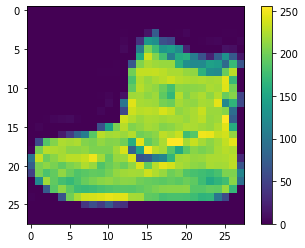

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

ニューラルネットワークにデータを投入する前に、これらの値を0から1までの範囲にスケールします。そのためには、画素の値を255で割ります。

**訓練用データセット**と**テスト用データセット**は、同じように前処理することが重要です。

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

**訓練用データセット**の最初の25枚の画像を、クラス名付きで表示してみましょう。ネットワークを構築・訓練する前に、データが正しいフォーマットになっていることを確認します。

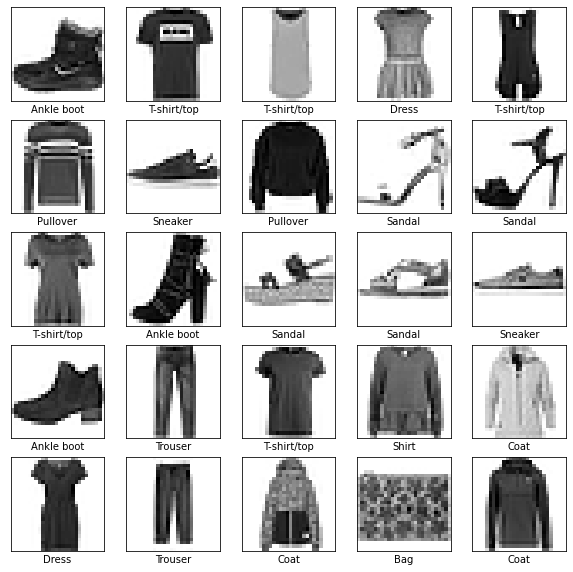

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## モデルの構築

ニューラルネットワークを構築するには、まずモデルの階層を定義し、その後モデルをコンパイルします。

### 層の設定

ニューラルネットワークを形作る基本的な構成要素は**層**（layer）です。層は、入力されたデータから「表現」を抽出します。それらの「表現」は、今取り組もうとしている問題に対して、より「意味のある」ものであることが期待されます。

ディープラーニングモデルのほとんどは、単純な層の積み重ねで構成されています。`tf.keras.layers.Dense` のような層のほとんどには、訓練中に学習されるパラメータが存在します。

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

このネットワークの最初の層は、`tf.keras.layers.Flatten` です。この層は、画像を（28×28ピクセルの）2次元配列から、28×28＝784ピクセルの、1次元配列に変換します。この層が、画像の中に積まれているピクセルの行を取り崩し、横に並べると考えてください。この層には学習すべきパラメータはなく、ただデータのフォーマット変換を行うだけです。

ピクセルが１次元化されたあと、ネットワークは2つの `tf.keras.layers.Dense` 層となります。これらの層は、密結合あるいは全結合されたニューロンの層となります。最初の  `Dense`  層には、128個のノード（あるはニューロン）があります。最後の層でもある2番めの層は、10ノードの**softmax**層です。この層は、合計が1になる10個の確率の配列を返します。それぞれのノードは、今見ている画像が10個のクラスのひとつひとつに属する確率を出力します。

### モデルのコンパイル

モデルが訓練できるようになるには、いくつかの設定を追加する必要があります。それらの設定は、モデルの**コンパイル**(compile）時に追加されます。

* **損失関数**（loss function） —訓練中のモデルが不正確であるほど大きな値となる関数です。この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。
* **オプティマイザ**（optimizer）—モデルが見ているデータと、損失関数の値から、どのようにモデルを更新するかを決定します。
* **メトリクス**（metrics） —訓練とテストのステップを監視するのに使用します。下記の例では*accuracy* （正解率）、つまり、画像が正しく分類された比率を使用しています。

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## モデルの訓練

ニューラルネットワークの訓練には次のようなステップが必要です。

1. モデルに訓練用データを投入します—この例では `train_images` と `train_labels` の２つの配列です。
2. モデルは、画像とラベルの対応関係を学習します。
3. モデルにテスト用データセットの予測（分類）を行わせます—この例では `test_images` 配列です。その後、予測結果と `test_labels` 配列を照合します。 

訓練を開始するには、`model.fit` メソッドを呼び出します。モデルを訓練用データに "fit"（適合）させるという意味です。

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


   1/1875 [..............................] - ETA: 23:23 - loss: 2.5539 - accuracy: 0.0625

  30/1875 [..............................] - ETA: 3s - loss: 1.7894 - accuracy: 0.3912   

  61/1875 [..............................] - ETA: 3s - loss: 1.4985 - accuracy: 0.4926

  90/1875 [>.............................] - ETA: 3s - loss: 1.3520 - accuracy: 0.5427

 120/1875 [>.............................] - ETA: 2s - loss: 1.2507 - accuracy: 0.5776

 149/1875 [=>............................] - ETA: 2s - loss: 1.1797 - accuracy: 0.6008

 179/1875 [=>............................] - ETA: 2s - loss: 1.1229 - accuracy: 0.6195

 209/1875 [==>...........................] - ETA: 2s - loss: 1.0769 - accuracy: 0.6346

 237/1875 [==>...........................] - ETA: 2s - loss: 1.0415 - accuracy: 0.6461

 267/1875 [===>..........................] - ETA: 2s - loss: 1.0090 - accuracy: 0.6565

 297/1875 [===>..........................] - ETA: 2s - loss: 0.9808 - accuracy: 0.6657

 327/1875 [====>.........................] - ETA: 2s - loss: 0.9561 - accuracy: 0.6738

 357/1875 [====>.........................] - ETA: 2s - loss: 0.9344 - accuracy: 0.6809

 388/1875 [=====>........................] - ETA: 2s - loss: 0.9145 - accuracy: 0.6875

 419/1875 [=====>........................] - ETA: 2s - loss: 0.8965 - accuracy: 0.6936

 449/1875 [======>.......................] - ETA: 2s - loss: 0.8805 - accuracy: 0.6990

 480/1875 [======>.......................] - ETA: 2s - loss: 0.8653 - accuracy: 0.7041

 509/1875 [=======>......................] - ETA: 2s - loss: 0.8523 - accuracy: 0.7084

 539/1875 [=======>......................] - ETA: 2s - loss: 0.8401 - accuracy: 0.7125

 569/1875 [========>.....................] - ETA: 2s - loss: 0.8288 - accuracy: 0.7164

 599/1875 [========>.....................] - ETA: 2s - loss: 0.8183 - accuracy: 0.7199

 628/1875 [=========>....................] - ETA: 2s - loss: 0.8088 - accuracy: 0.7231

 659/1875 [=========>....................] - ETA: 2s - loss: 0.7993 - accuracy: 0.7264

 688/1875 [==========>...................] - ETA: 2s - loss: 0.7910 - accuracy: 0.7292

 718/1875 [==========>...................] - ETA: 1s - loss: 0.7829 - accuracy: 0.7320

 749/1875 [==========>...................] - ETA: 1s - loss: 0.7749 - accuracy: 0.7346

 780/1875 [===========>..................] - ETA: 1s - loss: 0.7674 - accuracy: 0.7372

 810/1875 [===========>..................] - ETA: 1s - loss: 0.7605 - accuracy: 0.7395

 840/1875 [============>.................] - ETA: 1s - loss: 0.7538 - accuracy: 0.7417

 870/1875 [============>.................] - ETA: 1s - loss: 0.7475 - accuracy: 0.7438

 899/1875 [=============>................] - ETA: 1s - loss: 0.7417 - accuracy: 0.7458

 930/1875 [=============>................] - ETA: 1s - loss: 0.7358 - accuracy: 0.7477

 960/1875 [==============>...............] - ETA: 1s - loss: 0.7303 - accuracy: 0.7495

 990/1875 [==============>...............] - ETA: 1s - loss: 0.7251 - accuracy: 0.7513

1021/1875 [===============>..............] - ETA: 1s - loss: 0.7199 - accuracy: 0.7530

1050/1875 [===============>..............] - ETA: 1s - loss: 0.7153 - accuracy: 0.7545

1078/1875 [================>.............] - ETA: 1s - loss: 0.7110 - accuracy: 0.7560

1107/1875 [================>.............] - ETA: 1s - loss: 0.7066 - accuracy: 0.7574

1138/1875 [=================>............] - ETA: 1s - loss: 0.7022 - accuracy: 0.7589

1168/1875 [=================>............] - ETA: 1s - loss: 0.6980 - accuracy: 0.7602

1198/1875 [==================>...........] - ETA: 1s - loss: 0.6940 - accuracy: 0.7615

1227/1875 [==================>...........] - ETA: 1s - loss: 0.6902 - accuracy: 0.7628

1257/1875 [===================>..........] - ETA: 1s - loss: 0.6865 - accuracy: 0.7640

1287/1875 [===================>..........] - ETA: 0s - loss: 0.6828 - accuracy: 0.7652

1318/1875 [====================>.........] - ETA: 0s - loss: 0.6792 - accuracy: 0.7663

1348/1875 [====================>.........] - ETA: 0s - loss: 0.6757 - accuracy: 0.7675

1377/1875 [=====================>........] - ETA: 0s - loss: 0.6725 - accuracy: 0.7685

1406/1875 [=====================>........] - ETA: 0s - loss: 0.6694 - accuracy: 0.7695

1435/1875 [=====================>........] - ETA: 0s - loss: 0.6664 - accuracy: 0.7705

1466/1875 [======================>.......] - ETA: 0s - loss: 0.6632 - accuracy: 0.7715

1497/1875 [======================>.......] - ETA: 0s - loss: 0.6602 - accuracy: 0.7725

1528/1875 [=======================>......] - ETA: 0s - loss: 0.6572 - accuracy: 0.7735

1559/1875 [=======================>......] - ETA: 0s - loss: 0.6544 - accuracy: 0.7744

1589/1875 [========================>.....] - ETA: 0s - loss: 0.6517 - accuracy: 0.7753

1620/1875 [========================>.....] - ETA: 0s - loss: 0.6490 - accuracy: 0.7761

1650/1875 [=========================>....] - ETA: 0s - loss: 0.6464 - accuracy: 0.7770

1681/1875 [=========================>....] - ETA: 0s - loss: 0.6439 - accuracy: 0.7778

1711/1875 [==========================>...] - ETA: 0s - loss: 0.6414 - accuracy: 0.7786

1742/1875 [==========================>...] - ETA: 0s - loss: 0.6390 - accuracy: 0.7794

1773/1875 [===========================>..] - ETA: 0s - loss: 0.6366 - accuracy: 0.7802

1804/1875 [===========================>..] - ETA: 0s - loss: 0.6343 - accuracy: 0.7809

1835/1875 [============================>.] - ETA: 0s - loss: 0.6320 - accuracy: 0.7817

1865/1875 [============================>.] - ETA: 0s - loss: 0.6298 - accuracy: 0.7824

1875/1875 [==============================] - 4s 2ms/step - loss: 0.6290 - accuracy: 0.7827


Epoch 2/5
   1/1875 [..............................] - ETA: 3s - loss: 0.2991 - accuracy: 0.8125

  32/1875 [..............................] - ETA: 3s - loss: 0.4287 - accuracy: 0.8352

  62/1875 [..............................] - ETA: 3s - loss: 0.4036 - accuracy: 0.8449

  93/1875 [>.............................] - ETA: 2s - loss: 0.3941 - accuracy: 0.8489

 124/1875 [>.............................] - ETA: 2s - loss: 0.3903 - accuracy: 0.8510

 153/1875 [=>............................] - ETA: 2s - loss: 0.3878 - accuracy: 0.8526

 183/1875 [=>............................] - ETA: 2s - loss: 0.3861 - accuracy: 0.8538

 213/1875 [==>...........................] - ETA: 2s - loss: 0.3855 - accuracy: 0.8545

 244/1875 [==>...........................] - ETA: 2s - loss: 0.3846 - accuracy: 0.8553

 275/1875 [===>..........................] - ETA: 2s - loss: 0.3839 - accuracy: 0.8560

 307/1875 [===>..........................] - ETA: 2s - loss: 0.3833 - accuracy: 0.8566

 337/1875 [====>.........................] - ETA: 2s - loss: 0.3831 - accuracy: 0.8570

 368/1875 [====>.........................] - ETA: 2s - loss: 0.3829 - accuracy: 0.8573

 398/1875 [=====>........................] - ETA: 2s - loss: 0.3826 - accuracy: 0.8577

 429/1875 [=====>........................] - ETA: 2s - loss: 0.3822 - accuracy: 0.8580

 459/1875 [======>.......................] - ETA: 2s - loss: 0.3819 - accuracy: 0.8583

 488/1875 [======>.......................] - ETA: 2s - loss: 0.3817 - accuracy: 0.8586

 519/1875 [=======>......................] - ETA: 2s - loss: 0.3814 - accuracy: 0.8589

 549/1875 [=======>......................] - ETA: 2s - loss: 0.3812 - accuracy: 0.8592

 580/1875 [========>.....................] - ETA: 2s - loss: 0.3809 - accuracy: 0.8595

 611/1875 [========>.....................] - ETA: 2s - loss: 0.3807 - accuracy: 0.8597

 641/1875 [=========>....................] - ETA: 2s - loss: 0.3807 - accuracy: 0.8599

 671/1875 [=========>....................] - ETA: 2s - loss: 0.3807 - accuracy: 0.8600

 701/1875 [==========>...................] - ETA: 1s - loss: 0.3807 - accuracy: 0.8602

 730/1875 [==========>...................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8603

 761/1875 [===========>..................] - ETA: 1s - loss: 0.3805 - accuracy: 0.8605

 791/1875 [===========>..................] - ETA: 1s - loss: 0.3805 - accuracy: 0.8605

 821/1875 [============>.................] - ETA: 1s - loss: 0.3804 - accuracy: 0.8606

 852/1875 [============>.................] - ETA: 1s - loss: 0.3804 - accuracy: 0.8607

 882/1875 [=============>................] - ETA: 1s - loss: 0.3804 - accuracy: 0.8607

 911/1875 [=============>................] - ETA: 1s - loss: 0.3804 - accuracy: 0.8608

 942/1875 [==============>...............] - ETA: 1s - loss: 0.3803 - accuracy: 0.8608

 973/1875 [==============>...............] - ETA: 1s - loss: 0.3803 - accuracy: 0.8608

1004/1875 [===============>..............] - ETA: 1s - loss: 0.3803 - accuracy: 0.8609

1036/1875 [===============>..............] - ETA: 1s - loss: 0.3803 - accuracy: 0.8609

1066/1875 [================>.............] - ETA: 1s - loss: 0.3802 - accuracy: 0.8610

1097/1875 [================>.............] - ETA: 1s - loss: 0.3802 - accuracy: 0.8610

1126/1875 [=================>............] - ETA: 1s - loss: 0.3801 - accuracy: 0.8610

1157/1875 [=================>............] - ETA: 1s - loss: 0.3801 - accuracy: 0.8611

1188/1875 [==================>...........] - ETA: 1s - loss: 0.3801 - accuracy: 0.8611

1219/1875 [==================>...........] - ETA: 1s - loss: 0.3800 - accuracy: 0.8611

1250/1875 [===================>..........] - ETA: 1s - loss: 0.3800 - accuracy: 0.8611

1280/1875 [===================>..........] - ETA: 0s - loss: 0.3799 - accuracy: 0.8612

1310/1875 [===================>..........] - ETA: 0s - loss: 0.3799 - accuracy: 0.8612

1340/1875 [====================>.........] - ETA: 0s - loss: 0.3799 - accuracy: 0.8612

1370/1875 [====================>.........] - ETA: 0s - loss: 0.3798 - accuracy: 0.8613

1400/1875 [=====================>........] - ETA: 0s - loss: 0.3797 - accuracy: 0.8613

1430/1875 [=====================>........] - ETA: 0s - loss: 0.3797 - accuracy: 0.8614

1460/1875 [======================>.......] - ETA: 0s - loss: 0.3796 - accuracy: 0.8614

1489/1875 [======================>.......] - ETA: 0s - loss: 0.3795 - accuracy: 0.8614

1519/1875 [=======================>......] - ETA: 0s - loss: 0.3795 - accuracy: 0.8615

1551/1875 [=======================>......] - ETA: 0s - loss: 0.3794 - accuracy: 0.8615

1582/1875 [========================>.....] - ETA: 0s - loss: 0.3793 - accuracy: 0.8616

1612/1875 [========================>.....] - ETA: 0s - loss: 0.3792 - accuracy: 0.8616

1643/1875 [=========================>....] - ETA: 0s - loss: 0.3792 - accuracy: 0.8617

1675/1875 [=========================>....] - ETA: 0s - loss: 0.3791 - accuracy: 0.8617

1706/1875 [==========================>...] - ETA: 0s - loss: 0.3790 - accuracy: 0.8618

1737/1875 [==========================>...] - ETA: 0s - loss: 0.3789 - accuracy: 0.8618

1767/1875 [===========================>..] - ETA: 0s - loss: 0.3789 - accuracy: 0.8619

1799/1875 [===========================>..] - ETA: 0s - loss: 0.3788 - accuracy: 0.8619

1830/1875 [============================>.] - ETA: 0s - loss: 0.3787 - accuracy: 0.8620

1861/1875 [============================>.] - ETA: 0s - loss: 0.3786 - accuracy: 0.8620

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3786 - accuracy: 0.8621


Epoch 3/5
   1/1875 [..............................] - ETA: 3s - loss: 0.2371 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.2940 - accuracy: 0.9050

  56/1875 [..............................] - ETA: 3s - loss: 0.3020 - accuracy: 0.8960

  84/1875 [>.............................] - ETA: 3s - loss: 0.3093 - accuracy: 0.8909

 114/1875 [>.............................] - ETA: 3s - loss: 0.3135 - accuracy: 0.8885

 145/1875 [=>............................] - ETA: 3s - loss: 0.3158 - accuracy: 0.8870

 177/1875 [=>............................] - ETA: 2s - loss: 0.3176 - accuracy: 0.8856

 208/1875 [==>...........................] - ETA: 2s - loss: 0.3194 - accuracy: 0.8843

 239/1875 [==>...........................] - ETA: 2s - loss: 0.3207 - accuracy: 0.8836

 269/1875 [===>..........................] - ETA: 2s - loss: 0.3226 - accuracy: 0.8827

 299/1875 [===>..........................] - ETA: 2s - loss: 0.3245 - accuracy: 0.8818

 329/1875 [====>.........................] - ETA: 2s - loss: 0.3262 - accuracy: 0.8810

 359/1875 [====>.........................] - ETA: 2s - loss: 0.3275 - accuracy: 0.8803

 389/1875 [=====>........................] - ETA: 2s - loss: 0.3286 - accuracy: 0.8798

 419/1875 [=====>........................] - ETA: 2s - loss: 0.3295 - accuracy: 0.8795

 448/1875 [======>.......................] - ETA: 2s - loss: 0.3302 - accuracy: 0.8792

 478/1875 [======>.......................] - ETA: 2s - loss: 0.3309 - accuracy: 0.8790

 508/1875 [=======>......................] - ETA: 2s - loss: 0.3316 - accuracy: 0.8787

 539/1875 [=======>......................] - ETA: 2s - loss: 0.3323 - accuracy: 0.8784

 569/1875 [========>.....................] - ETA: 2s - loss: 0.3329 - accuracy: 0.8781

 600/1875 [========>.....................] - ETA: 2s - loss: 0.3334 - accuracy: 0.8779

 630/1875 [=========>....................] - ETA: 2s - loss: 0.3337 - accuracy: 0.8777

 661/1875 [=========>....................] - ETA: 2s - loss: 0.3341 - accuracy: 0.8775

 691/1875 [==========>...................] - ETA: 2s - loss: 0.3344 - accuracy: 0.8774

 720/1875 [==========>...................] - ETA: 1s - loss: 0.3347 - accuracy: 0.8773

 751/1875 [===========>..................] - ETA: 1s - loss: 0.3349 - accuracy: 0.8772

 782/1875 [===========>..................] - ETA: 1s - loss: 0.3351 - accuracy: 0.8771

 813/1875 [============>.................] - ETA: 1s - loss: 0.3353 - accuracy: 0.8770

 845/1875 [============>.................] - ETA: 1s - loss: 0.3355 - accuracy: 0.8769

 876/1875 [=============>................] - ETA: 1s - loss: 0.3357 - accuracy: 0.8768

 907/1875 [=============>................] - ETA: 1s - loss: 0.3358 - accuracy: 0.8767

 938/1875 [==============>...............] - ETA: 1s - loss: 0.3359 - accuracy: 0.8766

 968/1875 [==============>...............] - ETA: 1s - loss: 0.3361 - accuracy: 0.8765

 998/1875 [==============>...............] - ETA: 1s - loss: 0.3362 - accuracy: 0.8765

1029/1875 [===============>..............] - ETA: 1s - loss: 0.3363 - accuracy: 0.8764

1059/1875 [===============>..............] - ETA: 1s - loss: 0.3364 - accuracy: 0.8763

1090/1875 [================>.............] - ETA: 1s - loss: 0.3365 - accuracy: 0.8763

1121/1875 [================>.............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8762

1151/1875 [=================>............] - ETA: 1s - loss: 0.3366 - accuracy: 0.8762

1181/1875 [=================>............] - ETA: 1s - loss: 0.3367 - accuracy: 0.8762

1212/1875 [==================>...........] - ETA: 1s - loss: 0.3367 - accuracy: 0.8761

1242/1875 [==================>...........] - ETA: 1s - loss: 0.3368 - accuracy: 0.8761

1271/1875 [===================>..........] - ETA: 1s - loss: 0.3368 - accuracy: 0.8761

1302/1875 [===================>..........] - ETA: 0s - loss: 0.3368 - accuracy: 0.8760

1333/1875 [====================>.........] - ETA: 0s - loss: 0.3369 - accuracy: 0.8760

1365/1875 [====================>.........] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1395/1875 [=====================>........] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1426/1875 [=====================>........] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1457/1875 [======================>.......] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1486/1875 [======================>.......] - ETA: 0s - loss: 0.3371 - accuracy: 0.8760

1516/1875 [=======================>......] - ETA: 0s - loss: 0.3371 - accuracy: 0.8760

1547/1875 [=======================>......] - ETA: 0s - loss: 0.3371 - accuracy: 0.8760

1578/1875 [========================>.....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1609/1875 [========================>.....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1638/1875 [=========================>....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8760

1667/1875 [=========================>....] - ETA: 0s - loss: 0.3370 - accuracy: 0.8761

1695/1875 [==========================>...] - ETA: 0s - loss: 0.3369 - accuracy: 0.8761

1725/1875 [==========================>...] - ETA: 0s - loss: 0.3369 - accuracy: 0.8761

1755/1875 [===========================>..] - ETA: 0s - loss: 0.3369 - accuracy: 0.8761

1784/1875 [===========================>..] - ETA: 0s - loss: 0.3369 - accuracy: 0.8762

1814/1875 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8762

1844/1875 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8762

1874/1875 [============================>.] - ETA: 0s - loss: 0.3368 - accuracy: 0.8762

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3368 - accuracy: 0.8762


Epoch 4/5
   1/1875 [..............................] - ETA: 3s - loss: 0.2487 - accuracy: 0.9062

  29/1875 [..............................] - ETA: 3s - loss: 0.2867 - accuracy: 0.8862

  58/1875 [..............................] - ETA: 3s - loss: 0.2953 - accuracy: 0.8855

  88/1875 [>.............................] - ETA: 3s - loss: 0.2989 - accuracy: 0.8854

 119/1875 [>.............................] - ETA: 3s - loss: 0.2999 - accuracy: 0.8851

 150/1875 [=>............................] - ETA: 2s - loss: 0.3012 - accuracy: 0.8844

 181/1875 [=>............................] - ETA: 2s - loss: 0.3037 - accuracy: 0.8836

 213/1875 [==>...........................] - ETA: 2s - loss: 0.3053 - accuracy: 0.8830

 244/1875 [==>...........................] - ETA: 2s - loss: 0.3065 - accuracy: 0.8827

 273/1875 [===>..........................] - ETA: 2s - loss: 0.3076 - accuracy: 0.8825

 303/1875 [===>..........................] - ETA: 2s - loss: 0.3091 - accuracy: 0.8823

 333/1875 [====>.........................] - ETA: 2s - loss: 0.3101 - accuracy: 0.8822

 363/1875 [====>.........................] - ETA: 2s - loss: 0.3109 - accuracy: 0.8822

 392/1875 [=====>........................] - ETA: 2s - loss: 0.3116 - accuracy: 0.8822

 421/1875 [=====>........................] - ETA: 2s - loss: 0.3120 - accuracy: 0.8822

 451/1875 [======>.......................] - ETA: 2s - loss: 0.3124 - accuracy: 0.8822

 480/1875 [======>.......................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8822

 510/1875 [=======>......................] - ETA: 2s - loss: 0.3128 - accuracy: 0.8823

 541/1875 [=======>......................] - ETA: 2s - loss: 0.3128 - accuracy: 0.8824

 571/1875 [========>.....................] - ETA: 2s - loss: 0.3128 - accuracy: 0.8826

 602/1875 [========>.....................] - ETA: 2s - loss: 0.3128 - accuracy: 0.8827

 632/1875 [=========>....................] - ETA: 2s - loss: 0.3127 - accuracy: 0.8828

 662/1875 [=========>....................] - ETA: 2s - loss: 0.3127 - accuracy: 0.8829

 692/1875 [==========>...................] - ETA: 1s - loss: 0.3126 - accuracy: 0.8831

 723/1875 [==========>...................] - ETA: 1s - loss: 0.3125 - accuracy: 0.8832

 754/1875 [===========>..................] - ETA: 1s - loss: 0.3124 - accuracy: 0.8833

 785/1875 [===========>..................] - ETA: 1s - loss: 0.3122 - accuracy: 0.8834

 817/1875 [============>.................] - ETA: 1s - loss: 0.3121 - accuracy: 0.8835

 848/1875 [============>.................] - ETA: 1s - loss: 0.3120 - accuracy: 0.8836

 878/1875 [=============>................] - ETA: 1s - loss: 0.3118 - accuracy: 0.8837

 907/1875 [=============>................] - ETA: 1s - loss: 0.3118 - accuracy: 0.8838

 938/1875 [==============>...............] - ETA: 1s - loss: 0.3117 - accuracy: 0.8839

 968/1875 [==============>...............] - ETA: 1s - loss: 0.3116 - accuracy: 0.8839

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3116 - accuracy: 0.8840

1030/1875 [===============>..............] - ETA: 1s - loss: 0.3115 - accuracy: 0.8840

1061/1875 [===============>..............] - ETA: 1s - loss: 0.3115 - accuracy: 0.8841

1091/1875 [================>.............] - ETA: 1s - loss: 0.3115 - accuracy: 0.8842

1121/1875 [================>.............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8842

1151/1875 [=================>............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8843

1181/1875 [=================>............] - ETA: 1s - loss: 0.3114 - accuracy: 0.8843

1211/1875 [==================>...........] - ETA: 1s - loss: 0.3114 - accuracy: 0.8843

1241/1875 [==================>...........] - ETA: 1s - loss: 0.3114 - accuracy: 0.8844

1272/1875 [===================>..........] - ETA: 1s - loss: 0.3115 - accuracy: 0.8844

1303/1875 [===================>..........] - ETA: 0s - loss: 0.3115 - accuracy: 0.8844

1333/1875 [====================>.........] - ETA: 0s - loss: 0.3115 - accuracy: 0.8845

1364/1875 [====================>.........] - ETA: 0s - loss: 0.3115 - accuracy: 0.8845

1395/1875 [=====================>........] - ETA: 0s - loss: 0.3116 - accuracy: 0.8845

1425/1875 [=====================>........] - ETA: 0s - loss: 0.3116 - accuracy: 0.8845

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3116 - accuracy: 0.8845

1487/1875 [======================>.......] - ETA: 0s - loss: 0.3117 - accuracy: 0.8845

1518/1875 [=======================>......] - ETA: 0s - loss: 0.3117 - accuracy: 0.8845

1548/1875 [=======================>......] - ETA: 0s - loss: 0.3117 - accuracy: 0.8845

1578/1875 [========================>.....] - ETA: 0s - loss: 0.3117 - accuracy: 0.8845

1608/1875 [========================>.....] - ETA: 0s - loss: 0.3118 - accuracy: 0.8845

1639/1875 [=========================>....] - ETA: 0s - loss: 0.3118 - accuracy: 0.8845

1669/1875 [=========================>....] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1728/1875 [==========================>...] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1758/1875 [===========================>..] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1789/1875 [===========================>..] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1820/1875 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8845

1850/1875 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8846

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3119 - accuracy: 0.8846


Epoch 5/5
   1/1875 [..............................] - ETA: 3s - loss: 0.4639 - accuracy: 0.8438

  31/1875 [..............................] - ETA: 3s - loss: 0.2837 - accuracy: 0.8867

  61/1875 [..............................] - ETA: 3s - loss: 0.2900 - accuracy: 0.8850

  92/1875 [>.............................] - ETA: 2s - loss: 0.2927 - accuracy: 0.8857

 123/1875 [>.............................] - ETA: 2s - loss: 0.2917 - accuracy: 0.8867

 153/1875 [=>............................] - ETA: 2s - loss: 0.2916 - accuracy: 0.8868

 183/1875 [=>............................] - ETA: 2s - loss: 0.2920 - accuracy: 0.8867

 214/1875 [==>...........................] - ETA: 2s - loss: 0.2925 - accuracy: 0.8867

 244/1875 [==>...........................] - ETA: 2s - loss: 0.2931 - accuracy: 0.8869

 275/1875 [===>..........................] - ETA: 2s - loss: 0.2939 - accuracy: 0.8869

 306/1875 [===>..........................] - ETA: 2s - loss: 0.2948 - accuracy: 0.8868

 336/1875 [====>.........................] - ETA: 2s - loss: 0.2953 - accuracy: 0.8868

 367/1875 [====>.........................] - ETA: 2s - loss: 0.2956 - accuracy: 0.8869

 398/1875 [=====>........................] - ETA: 2s - loss: 0.2955 - accuracy: 0.8871

 428/1875 [=====>........................] - ETA: 2s - loss: 0.2955 - accuracy: 0.8873

 459/1875 [======>.......................] - ETA: 2s - loss: 0.2956 - accuracy: 0.8874

 490/1875 [======>.......................] - ETA: 2s - loss: 0.2957 - accuracy: 0.8875

 521/1875 [=======>......................] - ETA: 2s - loss: 0.2957 - accuracy: 0.8877

 551/1875 [=======>......................] - ETA: 2s - loss: 0.2958 - accuracy: 0.8878

 581/1875 [========>.....................] - ETA: 2s - loss: 0.2959 - accuracy: 0.8879

 612/1875 [========>.....................] - ETA: 2s - loss: 0.2959 - accuracy: 0.8881

 642/1875 [=========>....................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8881

 672/1875 [=========>....................] - ETA: 2s - loss: 0.2960 - accuracy: 0.8882

 703/1875 [==========>...................] - ETA: 1s - loss: 0.2960 - accuracy: 0.8883

 734/1875 [==========>...................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8884

 764/1875 [===========>..................] - ETA: 1s - loss: 0.2959 - accuracy: 0.8885

 795/1875 [===========>..................] - ETA: 1s - loss: 0.2958 - accuracy: 0.8886

 826/1875 [============>.................] - ETA: 1s - loss: 0.2958 - accuracy: 0.8886

 857/1875 [============>.................] - ETA: 1s - loss: 0.2958 - accuracy: 0.8887

 888/1875 [=============>................] - ETA: 1s - loss: 0.2957 - accuracy: 0.8888

 919/1875 [=============>................] - ETA: 1s - loss: 0.2956 - accuracy: 0.8889

 950/1875 [==============>...............] - ETA: 1s - loss: 0.2955 - accuracy: 0.8890

 982/1875 [==============>...............] - ETA: 1s - loss: 0.2954 - accuracy: 0.8891

1012/1875 [===============>..............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8892

1043/1875 [===============>..............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8892

1074/1875 [================>.............] - ETA: 1s - loss: 0.2953 - accuracy: 0.8893

1103/1875 [================>.............] - ETA: 1s - loss: 0.2952 - accuracy: 0.8894

1133/1875 [=================>............] - ETA: 1s - loss: 0.2952 - accuracy: 0.8894

1162/1875 [=================>............] - ETA: 1s - loss: 0.2952 - accuracy: 0.8895

1192/1875 [==================>...........] - ETA: 1s - loss: 0.2951 - accuracy: 0.8895

1221/1875 [==================>...........] - ETA: 1s - loss: 0.2951 - accuracy: 0.8896

1251/1875 [===================>..........] - ETA: 1s - loss: 0.2950 - accuracy: 0.8896

1281/1875 [===================>..........] - ETA: 0s - loss: 0.2950 - accuracy: 0.8896

1310/1875 [===================>..........] - ETA: 0s - loss: 0.2950 - accuracy: 0.8897

1339/1875 [====================>.........] - ETA: 0s - loss: 0.2950 - accuracy: 0.8897

1370/1875 [====================>.........] - ETA: 0s - loss: 0.2949 - accuracy: 0.8897

1401/1875 [=====================>........] - ETA: 0s - loss: 0.2949 - accuracy: 0.8898

1431/1875 [=====================>........] - ETA: 0s - loss: 0.2949 - accuracy: 0.8898

1461/1875 [======================>.......] - ETA: 0s - loss: 0.2949 - accuracy: 0.8898

1491/1875 [======================>.......] - ETA: 0s - loss: 0.2948 - accuracy: 0.8899

1521/1875 [=======================>......] - ETA: 0s - loss: 0.2948 - accuracy: 0.8899

1551/1875 [=======================>......] - ETA: 0s - loss: 0.2948 - accuracy: 0.8899

1580/1875 [========================>.....] - ETA: 0s - loss: 0.2948 - accuracy: 0.8899

1609/1875 [========================>.....] - ETA: 0s - loss: 0.2948 - accuracy: 0.8899

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1667/1875 [=========================>....] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1697/1875 [==========================>...] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1727/1875 [==========================>...] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1757/1875 [===========================>..] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1785/1875 [===========================>..] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1813/1875 [============================>.] - ETA: 0s - loss: 0.2948 - accuracy: 0.8900

1843/1875 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.8901

1874/1875 [============================>.] - ETA: 0s - loss: 0.2947 - accuracy: 0.8901

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2947 - accuracy: 0.8901


モデルの訓練の進行とともに、損失値と正解率が表示されます。このモデルの場合、訓練用データでは0.88（すなわち88%）の正解率に達します。

## 正解率の評価

次に、テスト用データセットに対するモデルの性能を比較します。

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3722 - accuracy: 0.8659



Test accuracy: 0.8658999800682068


ご覧の通り、テスト用データセットでの正解率は、訓練用データセットでの正解率よりも少し低くなります。この訓練時の正解率とテスト時の正解率の差は、**過学習**（over fitting）の一例です。過学習とは、新しいデータに対する機械学習モデルの性能が、訓練時と比較して低下する現象です。

## 予測する

モデルの訓練が終わったら、そのモデルを使って画像の分類予測を行うことが出来ます。

In [18]:
predictions = model.predict(test_images)

これは、モデルがテスト用データセットの画像のひとつひとつを分類予測した結果です。最初の予測を見てみましょう。

In [19]:
predictions[0]

array([1.5098491e-05, 1.3999789e-08, 3.2097114e-07, 1.3058383e-07,
       1.5631826e-06, 3.1381049e-03, 3.2296265e-07, 1.1332618e-01,
       1.2275040e-04, 8.8339549e-01], dtype=float32)

予測結果は、10個の数字の配列です。これは、その画像が10の衣料品の種類のそれぞれに該当するかの「確信度」を表しています。どのラベルが一番確信度が高いかを見てみましょう。

In [20]:
np.argmax(predictions[0])

9

というわけで、このモデルは、この画像が、アンクルブーツ、`class_names[9]` である可能性が最も高いと判断したことになります。これが正しいかどうか、テスト用ラベルを見てみましょう。

In [21]:
test_labels[0]

9

10チャンネルすべてをグラフ化してみることができます。

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

0番目の画像と、予測、予測配列を見てみましょう。

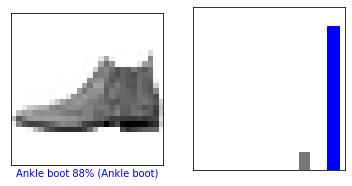

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

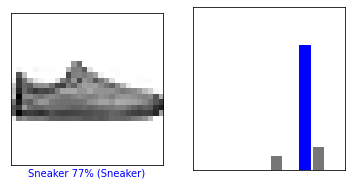

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

予測の中のいくつかの画像を、予測値とともに表示してみましょう。正しい予測は青で、誤っている予測は赤でラベルを表示します。数字は予測したラベルのパーセント（100分率）を示します。自信があるように見えても間違っていることがあることに注意してください。

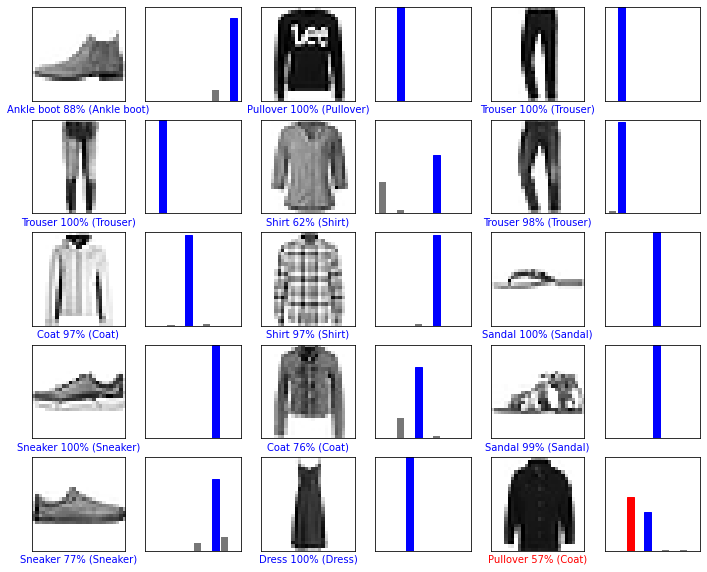

In [25]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示します。
# 正しい予測は青で、間違った予測は赤で表示しています。
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

最後に、訓練済みモデルを使って1枚の画像に対する予測を行います。

In [26]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]

print(img.shape)

(28, 28)


`tf.keras` モデルは、サンプルの中の**バッチ**（batch）あるいは「集まり」について予測を行うように作られています。そのため、1枚の画像を使う場合でも、リスト化する必要があります。

In [27]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


そして、予測を行います。

In [28]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.5098491e-05 1.3999762e-08 3.2097114e-07 1.3058383e-07 1.5631826e-06
  3.1381049e-03 3.2296265e-07 1.1332618e-01 1.2275040e-04 8.8339549e-01]]


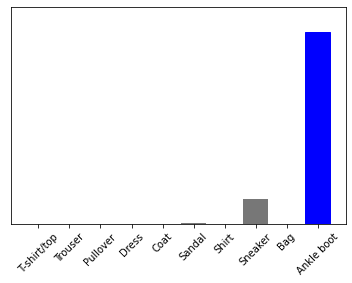

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` メソッドの戻り値は、リストのリストです。リストの要素のそれぞれが、バッチの中の画像に対応します。バッチの中から、（といってもバッチの中身は１つだけですが）予測を取り出します。

In [30]:
np.argmax(predictions_single[0])

9

というわけで、モデルは9というラベルを予測しました。